# Deterministic Model 03: Ověření modelu (Model Verification)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

import pandas as pd
import matplotlib.pyplot as plt

### Načtení reálných a simulačních dat

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df_sim"
other_path = '../../data/02_DetermModel/model_data.csv'
df_sim = pd.read_csv(other_path, header=0)

In [4]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_sim.head(5)

Prvních 5 řádků datového rámce


,x,y,z,dist,time
0,74,459,1284,4840,39.019
1,-90,4908,2217,4571,38.212
2,522,3074,26,2718,32.653
3,425,2247,2739,4318,37.453
4,516,3425,1590,3308,34.423


In [5]:
# Základní deskriptivní statistika simulovaného datasetu
df_sim.describe()

,x,y,z,dist,time
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,1422.944700,1336.856500,1374.817600,5858.04950,42.073149
std,1440.916105,1512.725045,805.317921,2172.83209,6.518496
min,-99.000000,-99.000000,0.000000,1984.00000,30.451000
25%,248.000000,202.000000,676.000000,3918.00000,36.253000
50%,599.500000,521.000000,1374.500000,5705.00000,41.614000
75%,2591.250000,2435.000000,2076.000000,7737.25000,47.710750
max,4599.000000,4949.000000,2749.000000,10789.00000,56.866000


In [6]:
# Soubor je načten a přiřazen do proměnné ‚df_real"
other_path = '../../data/02_DetermModel/model_data_real.csv'
df_real = pd.read_csv(other_path, header=0)


In [7]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_real.head(5)

Prvních 5 řádků datového rámce


,id,x,y,z,time,delay,type_delay,total_time,dist,time_calc
0,150,1315,220,1000,29,0,0,29,3443,34.828
1,75,220,1190,500,33,0,0,33,3590,35.269
2,239,220,940,2000,35,6,3,41,4387,37.660
3,199,1315,220,1500,36,0,0,36,3636,35.407
4,51,3690,220,250,50,0,0,50,5767,41.800


In [8]:
# Základní deskriptivní statistika simulovaného datasetu
df_real.describe()

,id,x,y,z,time,delay,type_delay,total_time,dist,time_calc
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,139.049689,1314.428571,1091.807453,993.788820,36.285714,5.708075,0.254658,41.993789,3905.074534,36.214224
std,79.374177,1288.402896,1361.839636,702.645843,6.771658,25.355384,0.800621,27.037358,1216.112302,3.648337
min,2.000000,95.000000,95.000000,0.000000,24.000000,0.000000,0.000000,24.000000,1840.000000,30.019000
25%,71.000000,220.000000,220.000000,500.000000,32.000000,0.000000,0.000000,32.000000,2875.000000,33.124000
50%,141.000000,690.000000,220.000000,1000.000000,35.000000,0.000000,0.000000,36.000000,3767.000000,35.800000
75%,203.000000,2440.000000,1565.000000,1500.000000,39.000000,0.000000,0.000000,42.000000,4744.000000,38.731000
max,277.000000,4002.000000,4690.000000,2250.000000,56.000000,200.000000,4.000000,250.000000,6609.000000,44.326000


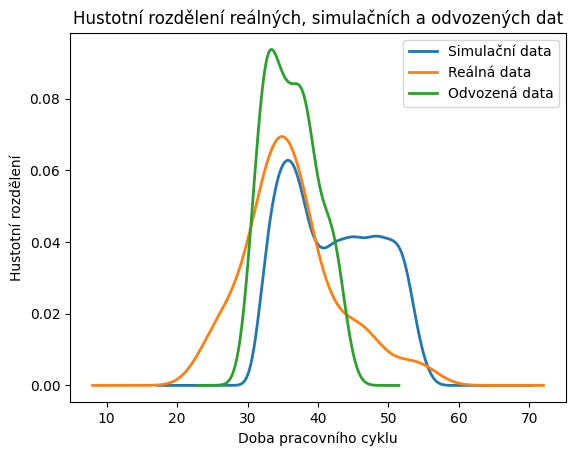

In [9]:
# Graf: Hustotní rozdělení reálných, simulačních a odvozených dat
df_sim['time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Simulační data')
df_real['time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Reálná data')
df_real['time_calc'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Odvozená data')

plt.xlabel("Doba pracovního cyklu")
plt.ylabel("Hustotní rozdělení")
plt.title('Hustotní rozdělení reálných, simulačních a odvozených dat')

plt.legend()
plt.show()

### KS test: jednostranný
Simulační data vs. normální rozdělení

In [10]:
### KS test: jednostranný (porovnání simulovaných dat s normálním rozdělením)

# Vzorek 1 – simulovaná data (deterministický model po kalibraci)
sample1 = df_sim['time'].to_numpy()

# Generování referenčního normálního rozdělení
np.random.seed(122)           # nastavení semene pro reprodukovatelnost
sample_size = 500             # velikost náhodného vzorku
mean = df_sim['time'].mean()
std_dev = df_sim['time'].std()

sample2 = np.random.normal(mean, std_dev, sample_size)

# Výpočet Kolmogorovova–Smirnovova testu (dvouvýběrový test)
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov-Smirnovova statistika: 0.07815
P-hodnota: 0.004866995835880631
Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.


### KS test: oboustranný
Simulační data vs. reálná data

In [11]:
### KS test: oboustranný (porovnání simulačních a reálných dat)

# Vzorek 1 – simulovaná data (deterministický model)
sample1 = df_sim['time'].to_numpy()

# Vzorek 2 – reálná měřená data
sample2 = df_real['time'].to_numpy()

# Výpočet oboustranného Kolmogorovova–Smirnovova testu
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov-Smirnovova statistika: 0.37906925465838515
P-hodnota: 3.587598122912482e-21
Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.


### KS test: oboustranný
Simulační data vs. odvozená data

In [12]:
### KS test: oboustranný (porovnání simulačních a odvozených dat)

# Vzorek 1 – simulovaná data (deterministický model)
sample1 = df_sim['time'].to_numpy()

# Vzorek 2 – reálná odvozená data
sample2 = df_real['time_calc'].to_numpy()

# Výpočet oboustranného Kolmogorovova–Smirnovova testu
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov-Smirnovova statistika: 0.4195829192546584
P-hodnota: 4.8338183222516043e-26
Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.


### KS test: oboustranný
Reálná data vs. odvozená data

In [13]:
### KS test: oboustranný (porovnání reálných a odvozených dat)

# Vzorek 1 – reálná data
sample1 = df_real['time'].to_numpy()

# Vzorek 2 – reálná odvozená data
sample2 = df_real['time_calc'].to_numpy()

# Výpočet oboustranného Kolmogorovova–Smirnovova testu
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnovova statistika: {ks_statistic}')
print(f'P-hodnota: {p_value}')

# Testování na hladině významnosti α = 0.05
alpha = 0.05

if p_value < alpha:
    print("Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.")
else:
    print("Nezamítáme nulovou hypotézu. Není dostatek důkazů pro tvrzení, že rozdělení jsou odlišná.")

Kolmogorov-Smirnovova statistika: 0.16770186335403728
P-hodnota: 0.02144986523181142
Zamítáme nulovou hypotézu. Vzorky pocházejí z různých rozdělení.


### Monte Carlo Validation: Opakované podvzorkování na velikost reality

In [14]:
# Bootstrap vzorkování ze simulace na velikost reálného datasetu
n_real = len(df_real)

sim_samples = []

for _ in range(1000):
    sample = df_sim.sample(n=n_real, replace=True, random_state=122 + _)
    sim_samples.append(sample['time'])

### KS test pro každé podvzorkování (Reálná data)

In [15]:
# Výpočet KS p-hodnot pro porovnání reálných a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['time'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [16]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací (Reálná data):", valid_ratio)

Podíl validních simulací (Reálná data): 0.0


### Distribuce KS p-hodnoty (Reálná data)

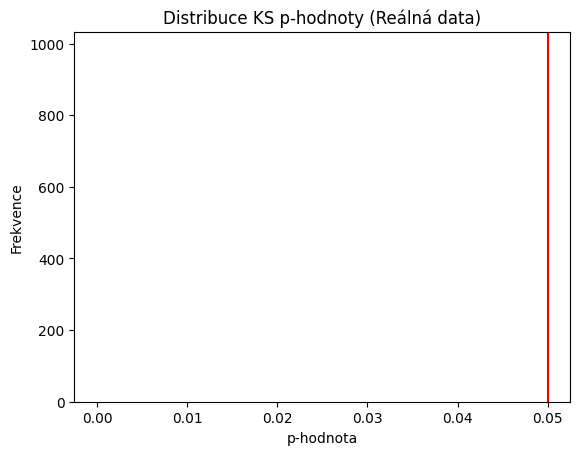

In [17]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty (Reálná data)")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### KS test pro každé podvzorkování (Odvozená data)

In [18]:
# Výpočet KS p-hodnot pro porovnání odvozených a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['time_calc'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [19]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací (Odvozená data):", valid_ratio)

Podíl validních simulací (Odvozená data): 0.0


### Distribuce KS p-hodnoty (Kalibrovaná data)

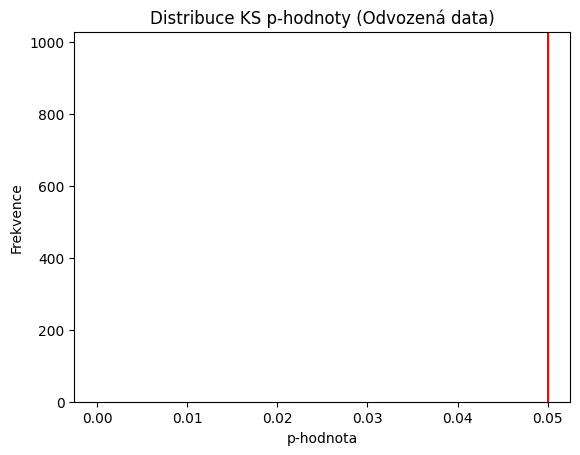

In [20]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty (Odvozená data)")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### Porovnání průměru a směrodatné odchylky

In [21]:
# Porovnání simulovaných a reálných dat

# Výpočet průměrných hodnot
mean_sim = df_sim['time'].mean()
mean_real = df_real['time'].mean()

# Výpočet směrodatných odchylek
std_sim = df_sim['time'].std()
std_real = df_real['time'].std()

# Relativní odchylka průměrů
mean_diff = abs(mean_sim - mean_real) / abs(mean_real)

# Poměr směrodatných odchylek
std_ratio = std_sim / std_real

# Relativní odchylka směrodatných odchylek
std_diff_rela = abs(std_sim - std_real) / abs(std_real)

print(f'Relativní odchylka průměrů: {mean_diff * 100:.2f}%')
print(f'Poměr směrodatných odchylek: {std_ratio:.4f}')
print(f'Relativní odchylka směrodatných odchylek: {std_diff_rela * 100:.2f}%')

alpha = 0.05

if mean_diff > alpha:
    print('Relativní odchylka průměrů přesahuje zvolenou hranici α.')
else:
    print('Relativní odchylka průměrů nepřesahuje zvolenou hranici α.')

Relativní odchylka průměrů: 15.95%
Poměr směrodatných odchylek: 0.9626
Relativní odchylka směrodatných odchylek: 3.74%
Relativní odchylka průměrů přesahuje zvolenou hranici α.


In [22]:
# Porovnání simulovaných a odvozenýchh dat

# Výpočet průměrných hodnot
mean_sim = df_sim['time'].mean()
mean_real = df_real['time_calc'].mean()

# Výpočet směrodatných odchylek
std_sim = df_sim['time'].std()
std_real = df_real['time_calc'].std()

# Relativní odchylka průměrů
mean_diff = abs(mean_sim - mean_real) / abs(mean_real)

# Poměr směrodatných odchylek
std_ratio = std_sim / std_real

# Relativní odchylka směrodatných odchylek
std_diff_rela = abs(std_sim - std_real) / abs(std_real)

print(f'Relativní odchylka průměrů: {mean_diff * 100:.2f}%')
print(f'Poměr směrodatných odchylek: {std_ratio:.4f}')
print(f'Relativní odchylka směrodatných odchylek: {std_diff_rela * 100:.2f}%')

alpha = 0.05

if mean_diff > alpha:
    print('Relativní odchylka průměrů přesahuje zvolenou hranici α.')
else:
    print('Relativní odchylka průměrů nepřesahuje zvolenou hranici α.')

Relativní odchylka průměrů: 16.18%
Poměr směrodatných odchylek: 1.7867
Relativní odchylka směrodatných odchylek: 78.67%
Relativní odchylka průměrů přesahuje zvolenou hranici α.


### Parametrické porovnání dat

In [23]:
def parametric_verification(
    s1: pd.Series,
    s2: pd.Series,
    alpha: float = 0.05,
    equal_var_test: str = "levene",
    normality_test: str = "shapiro"
):
    """
    Parametrická verifikace dvou datových souborů (pandas Series).

    Testuje:
        1) normalitu rozdělení
        2) shodu rozptylů
        3) rozdíl středních hodnot (t-test)
        4) velikost efektu (Cohenovo d)

    Parametry:
        s1, s2 : porovnávané datové série
        alpha  : hladina významnosti
        equal_var_test : metoda testu shody rozptylů ("levene")
        normality_test : metoda testu normality ("shapiro")

    Návrat:
        dict s výsledky testů
    """

    result = {}

    # 1. Test normality (Shapiro-Wilk)
    if normality_test == "shapiro":
        n1 = stats.shapiro(s1)
        n2 = stats.shapiro(s2)

    result["normality"] = {
        "s1_p": n1.pvalue,
        "s2_p": n2.pvalue,
        "normal": (n1.pvalue > alpha) and (n2.pvalue > alpha)
    }

    # 2. Test shody rozptylů (Levene)
    if equal_var_test == "levene":
        var_test = stats.levene(s1, s2)

    result["variance"] = {
        "p_value": var_test.pvalue,
        "equal": var_test.pvalue > alpha
    }

    # 3. Dvouvýběrový t-test
    equal_var = result["variance"]["equal"]

    t = stats.ttest_ind(s1, s2, equal_var=equal_var)

    result["ttest"] = {
        "t_stat": t.statistic,
        "p_value": t.pvalue,
        "different_mean": t.pvalue < alpha
    }

    # 4. Velikost efektu (Cohenovo d)
    pooled_std = np.sqrt(
        ((s1.std() ** 2) + (s2.std() ** 2)) / 2
    )

    # ochrana proti dělení nulou
    if pooled_std == 0:
        cohen_d = 0
    else:
        cohen_d = (s1.mean() - s2.mean()) / pooled_std

    result["effect_size"] = {
        "cohen_d": cohen_d
    }

    return result

In [24]:
result = parametric_verification(df_sim['time'], df_real['time_calc'])
print(f"""
Normalita:
  s1 p-value: {result['normality']['s1_p']:.5f}
  s2 p-value: {result['normality']['s2_p']:.5f}
  Normalita splněna: {result['normality']['normal']}

Shoda rozptylů:
  p-value: {result['variance']['p_value']:.5f}
  Rozptyly shodné: {result['variance']['equal']}

T-test:
  t-statistika: {result['ttest']['t_stat']:.5f}
  p-value: {result['ttest']['p_value']:.5f}
  Rozdíl průměrů významný: {result['ttest']['different_mean']}

Velikost efektu:
  Cohen d: {result['effect_size']['cohen_d']:.4f}
""")


Normalita:
  s1 p-value: 0.00000
  s2 p-value: 0.00054
  Normalita splněna: False

Shoda rozptylů:
  p-value: 0.00000
  Rozptyly shodné: False

T-test:
  t-statistika: 20.11992
  p-value: 0.00000
  Rozdíl průměrů významný: True

Velikost efektu:
  Cohen d: 1.1092



c:\Users\usman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
result = parametric_verification(df_sim['time'], df_real['time_calc'])
print(f"""
Normalita:
  s1 p-value: {result['normality']['s1_p']:.5f}
  s2 p-value: {result['normality']['s2_p']:.5f}
  Normalita splněna: {result['normality']['normal']}

Shoda rozptylů:
  p-value: {result['variance']['p_value']:.5f}
  Rozptyly shodné: {result['variance']['equal']}

T-test:
  t-statistika: {result['ttest']['t_stat']:.5f}
  p-value: {result['ttest']['p_value']:.5f}
  Rozdíl průměrů významný: {result['ttest']['different_mean']}

Velikost efektu:
  Cohen d: {result['effect_size']['cohen_d']:.4f}
""")


Normalita:
  s1 p-value: 0.00000
  s2 p-value: 0.00054
  Normalita splněna: False

Shoda rozptylů:
  p-value: 0.00000
  Rozptyly shodné: False

T-test:
  t-statistika: 20.11992
  p-value: 0.00000
  Rozdíl průměrů významný: True

Velikost efektu:
  Cohen d: 1.1092



In [26]:
# Neparametrický Mann–Whitneyův U test (oboustranný)
# Testuje, zda se dvě nezávislé skupiny statisticky významně liší
# v centrální tendenci (mediánu).

stats.mannwhitneyu(
    df_sim['time'],
    df_real['time'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=np.float64(2365423.0), pvalue=np.float64(9.584303403489378e-25))

In [27]:
# Neparametrický Mann–Whitneyův U test (oboustranný)
# Testuje, zda se dvě nezávislé skupiny statisticky významně liší
# v centrální tendenci (mediánu).

stats.mannwhitneyu(
    df_sim['time'],
    df_real['time_calc'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=np.float64(2444603.0), pvalue=np.float64(7.687688221721539e-30))

### Vyhodnocení shody simulovaných a odvozených dat

********
**Test normality (Shapiro–Wilk)**

s1 p-value = 0.00000

s2 p-value = 0.00054

Normalita splněna: False

*Interpretace*:

Simulační data (s1) nesplňují předpoklad normality.

Reálná data (s2) nesplňují předpoklad normality.

Celkově tedy nelze předpokládat normalitu obou souborů.

Parametrický t-test je zde metodicky hraniční, proto je vhodné použít i neparametrický test (Mann–Whitney)
********
**Shoda rozptylů (Levene)**

p-value = 0.00000

Rozptyly shodné: False

*Interpretace:*

Rozptyly obou souborů se statisticky významně liší.

To potvrzuje strukturální rozdíl variability mezi simulovanými a odvozenými daty.
*******
**t-test (porovnání průměrů)**

t-statistika ≈ 20.11992

p-value = 0.0

Rozdíl průměrů je statisticky významný.

*Interpretace:*

p = 0 → zamítnutí nulové hypotézy.

Průměrné hodnoty obou souborů se liší.

Kalibrace modelu je nutná.
********
**Velikost efektu (Cohen d)**

Cohen d = 1.1092

*Interpretace:*

Efekt není zanedbatelný.
Rozdíl mezi soubory není pouze statisticky významný, ale i prakticky významný.
********
**Mann–Whitney U test (neparametrický)**

p-value ≈ 0.00

*Interpretace:*

p = 0 → zamítnutí nulové hypotézy.

Mediány obou rozdělení se statisticky významně liší.

Neparametrický test potvrzuje závěr t-testu.

### Simulační model vykazuje systematickou odchylku od reálných dat a jeho kalibrace je nutná.

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-25 | 1.1 | Vjačeslav Usmanov| added DM_03_Model_Verification.ipynb |
| 2026-02-14 | 1.2 | Vjačeslav Usmanov| changed DM_03_Model_Verification.ipynb |